In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
world_GDP = pd.read_csv('./data/world GDP.csv',encoding='CP949')
world_GDP=world_GDP.set_index('Country')

c_list =list(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States','Ukraine'])
for i in world_GDP.index:
    if i not in c_list:
        world_GDP=world_GDP.drop(i)

world_GDP_init=pd.DataFrame(world_GDP.mean(axis=1)).sort_index()
world_GDP_init.columns=(['a'])
world_GDP_change=world_GDP_init.copy()
world_GDP=world_GDP_init.copy()
print(world_GDP)
world_transport = pd.read_csv('./data/WITS-Partner-Timeseries Export.csv',encoding='CP949')
world_transport=world_transport[world_transport['Reporter Name'].isin(c_list)]
world_transport=world_transport[world_transport['Partner Name'].isin(c_list)]

world_transport['mean']=world_transport.mean(axis=1)
world_transport=pd.pivot_table(world_transport,index='Reporter Name',columns='Partner Name',values='mean')
world_transport=world_transport.fillna(0).sort_index()

world_transport_volume = pd.read_csv('./data/WITS-Partner.csv',encoding='CP949')
world_transport_volume=world_transport_volume.set_index('Partner Name').sort_index()
for i in world_transport_volume.index:
    if i not in c_list:
        world_transport_volume=world_transport_volume.drop(i)
df2 = pd.read_csv('./data/세계 GDP.csv',encoding='CP949')
무역의존도 = pd.read_csv('./data/무역의존도.csv',encoding='CP949')
무역의존도=무역의존도.set_index('Country')
수출 = 무역의존도['2010 수출']

수출=수출/100
world_transport=world_transport/100

수출량 = 수출 * world_GDP_init.sort_index().transpose()
수출량=수출량.transpose()
수출량=수출량.dropna()
수출량.loc['Ukraine']=수출량.loc['Latvia']
수출량.loc['Russian Federation']/=2

                               a
Country                         
Argentina           2.035995e+11
Australia           4.511172e+11
Austria             1.784678e+11
Belgium             2.197720e+11
Brazil              6.988983e+11
Bulgaria            3.039374e+10
Canada              6.711232e+11
Chile               8.136243e+10
China               2.374243e+12
Czech Republic      1.348815e+11
Denmark             1.618328e+11
Estonia             1.584007e+10
Finland             1.144563e+11
France              1.229241e+12
Germany             2.015667e+12
Greece              1.154183e+11
Hungary             9.685934e+10
India               6.258009e+11
Indonesia           2.866730e+11
Ireland             9.784570e+10
Israel              1.012759e+11
Italy               9.847651e+11
Japan               2.781435e+12
Korea, Rep.         4.812253e+11
Latvia              2.053494e+10
Lithuania           3.073898e+10
Mexico              4.631568e+11
Netherlands         3.707321e+11
New Zealan

In [5]:
world_transport

Partner Name,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,United States
Reporter Name,,,,,,,,,,,,,,,,,,,,,
Argentina,0.000000,0.005099,0.000222,0.007368,0.210239,0.000850,0.012624,0.073492,0.057373,0.000467,...,0.000077,0.000441,0.011912,0.033988,0.001059,0.008145,0.005488,0.000687,0.011964,0.084288
Australia,0.000933,0.000000,0.000343,0.005960,0.004432,0.000254,0.008510,0.001354,0.137324,0.000501,...,0.000037,0.000102,0.007160,0.004102,0.001977,0.004209,0.002874,0.000310,0.034164,0.062312
Austria,0.001054,0.005589,0.000000,0.014394,0.004808,0.004369,0.007241,0.000856,0.015941,0.032400,...,0.016497,0.018811,0.003923,0.021767,0.011289,0.053718,0.008167,0.004160,0.035230,0.050438
Belgium,0.001232,0.004612,0.010144,0.000000,0.006077,0.001215,0.006123,0.000928,0.014279,0.007247,...,0.002269,0.001346,0.003689,0.031994,0.014709,0.013864,0.010976,0.001586,0.083105,0.057682
Brazil,0.080472,0.004312,0.001390,0.020943,0.000000,0.000949,0.012645,0.022896,0.084514,0.000429,...,0.000443,0.001244,0.007039,0.018892,0.003382,0.006634,0.005063,0.001307,0.023840,0.175289
Bulgaria,0.000659,0.000949,0.017614,0.047981,0.001883,0.000000,0.004076,0.000330,0.011889,0.009123,...,0.005136,0.006227,0.001721,0.027059,0.005502,0.007681,0.089752,0.016940,0.023761,0.025811
Canada,0.000604,0.004033,0.000852,0.005654,0.004005,0.000163,0.000000,0.001320,0.021457,0.000298,...,0.000080,0.000120,0.001050,0.002443,0.001147,0.003032,0.001389,0.000244,0.024064,0.794341
Chile,0.025136,0.005204,0.000645,0.013801,0.051497,0.003807,0.014902,0.000000,0.125311,0.000097,...,0.000015,0.000044,0.002943,0.022718,0.004998,0.005644,0.003780,0.000191,0.034507,0.147514
China,0.002728,0.014750,0.001172,0.008771,0.008684,0.000475,0.013007,0.003990,0.000000,0.002661,...,0.000701,0.000552,0.005230,0.009247,0.003236,0.002351,0.005420,0.002159,0.023480,0.186733


In [32]:
def mean_norm(df_input):
    return df_input.apply(lambda x: ((x)/ x.sum()))
def mean_norm2(df_input):
    return df_input.apply(lambda x: ((x-x.mean())/ x.std()))

In [46]:
1/mean_norm(world_GDP)**(1/4)

,a
Country,
Argentina,3.393398
Australia,2.781356
Austria,3.507026
Belgium,3.329169
Brazil,2.493018
Bulgaria,5.459249
Canada,2.518421
Chile,4.267986
China,1.836317


In [33]:
((1/mean_norm2(world_GDP)*103)**5).sort_values(by='a')

,a
Country,
India,-9.534819e+23
Spain,-4.593859e+16
"Korea, Rep.",-4.931942e+14
Mexico,-2.758384e+14
Australia,-1.938364e+14
Netherlands,-2.973804e+13
Poland,-1.194164e+13
Indonesia,-7.228514e+12
Turkey,-5.805290e+12


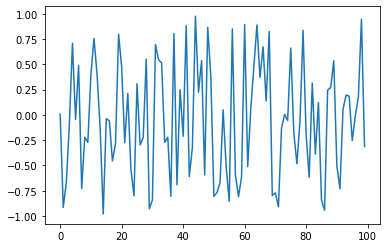

In [171]:
plt.plot([(random.random()-0.5)*2 for i in range(100)])

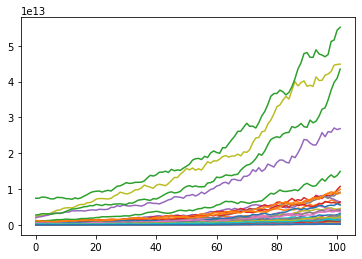

In [172]:
K=0.015

for i in c_list:
    for j in c_list:
        world_GDP_change.loc[i] += 수출량.loc[i]*(world_transport.loc[i][j])
        world_GDP_change.loc[j] -= 수출량.loc[i]*(world_transport.loc[i][j])
    world_GDP_change.loc[i]+=K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
world_GDP=pd.concat([world_GDP_init,world_GDP_change],axis=1)

for k in range(100):
    random_event=((np.log(world_GDP_change).max()-np.log(world_GDP_change))*2+5)
    for i in c_list:
        for j in c_list:
            world_GDP_change.loc[i] += (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j] 
            world_GDP_change.loc[j] -= (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j]
        world_GDP_change.loc[i] += K*world_GDP.loc[i][-1]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
        world_GDP_change.loc[i] *= (100-(2*(random.random()-0.5)*random_event.loc[i]['a']))/100
    world_GDP=pd.concat([world_GDP,world_GDP_change],axis=1)
world_GDP.columns=range(102)
plt.plot(world_GDP.transpose())
plt.show()


In [192]:
world_GDP.sum(axis=1)

Country
Argentina             2.035995e+11
Australia             4.511172e+11
Austria               1.784678e+11
Belgium               2.197720e+11
Brazil                6.988983e+11
Bulgaria              3.039374e+10
Canada                6.711232e+11
Chile                 8.136243e+10
China                 2.374243e+12
Czech Republic        1.348815e+11
Denmark               1.618328e+11
Estonia               1.584007e+10
Finland               1.144563e+11
France                1.229241e+12
Germany               2.015667e+12
Greece                1.154183e+11
Hungary               9.685934e+10
India                 6.258009e+11
Indonesia             2.866730e+11
Ireland               9.784570e+10
Israel                1.012759e+11
Italy                 9.847651e+11
Japan                 2.781435e+12
Korea, Rep.           4.812253e+11
Latvia                2.053494e+10
Lithuania             3.073898e+10
Mexico                4.631568e+11
Netherlands           3.707321e+11
New Zealand 

In [173]:
GDP_grad=world_GDP.copy()
for i in range(0,101):
    GDP_grad[i]=((world_GDP[i+1]-world_GDP[i])/world_GDP[i])*100

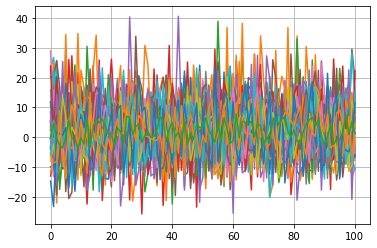

In [178]:
plt.plot(GDP_grad.transpose()[:-1])
plt.grid(True)

In [55]:
normal_GDP_grad=GDP_grad.copy()
normal_world_GDP=world_GDP.copy()

In [177]:
((np.log(world_GDP_change).max()-np.log(world_GDP_change))*2+5)

,a
Country,
Argentina,10.697465
Australia,9.495782
Austria,11.418651
Belgium,11.448544
Brazil,9.304647
Bulgaria,15.111647
Canada,10.032602
Chile,12.854873
China,5.412797


In [130]:
import random
import pandas as pd
import matplotlib.pyplot as plt
world_GDP = pd.read_csv('./data/world GDP.csv',encoding='CP949')
world_GDP=world_GDP.set_index('Country')

c_list =list(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States','Ukraine'])
for i in world_GDP.index:
    if i not in c_list:
        world_GDP=world_GDP.drop(i)

world_GDP_init=pd.DataFrame(world_GDP.mean(axis=1)).sort_index()
world_GDP_init.columns=(['a'])
world_GDP_change=world_GDP_init.copy()
world_GDP=world_GDP_init.copy()

world_transport = pd.read_csv('./data/WITS-Partner-Timeseries Export.csv',encoding='CP949')
world_transport=world_transport[world_transport['Reporter Name'].isin(c_list)]
world_transport=world_transport[world_transport['Partner Name'].isin(c_list)]

world_transport['mean']=world_transport.mean(axis=1)
world_transport=pd.pivot_table(world_transport,index='Reporter Name',columns='Partner Name',values='mean')
world_transport=world_transport.fillna(0).sort_index()

world_transport_volume = pd.read_csv('./data/WITS-Partner.csv',encoding='CP949')
world_transport_volume=world_transport_volume.set_index('Partner Name').sort_index()
for i in world_transport_volume.index:
    if i not in c_list:
        world_transport_volume=world_transport_volume.drop(i)
df2 = pd.read_csv('./data/세계 GDP.csv',encoding='CP949')
무역의존도 = pd.read_csv('./data/무역의존도.csv',encoding='CP949')
무역의존도=무역의존도.set_index('Country')
수출 = 무역의존도['2010 수출']

수출=수출/100
world_transport=world_transport/100

수출량 = 수출 * world_GDP_init.sort_index().transpose()
수출량=수출량.transpose()
수출량=수출량.dropna()
수출량.loc['Ukraine']=수출량.loc['Latvia']
수출량.loc['Russian Federation']/=2

In [131]:
world_transport

Partner Name,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,United States
Reporter Name,,,,,,,,,,,,,,,,,,,,,
Argentina,0.000000,0.005099,0.000222,0.007368,0.210239,0.000850,0.012624,0.073492,0.057373,0.000467,...,0.000077,0.000441,0.011912,0.033988,0.001059,0.008145,0.005488,0.000687,0.011964,0.084288
Australia,0.000933,0.000000,0.000343,0.005960,0.004432,0.000254,0.008510,0.001354,0.137324,0.000501,...,0.000037,0.000102,0.007160,0.004102,0.001977,0.004209,0.002874,0.000310,0.034164,0.062312
Austria,0.001054,0.005589,0.000000,0.014394,0.004808,0.004369,0.007241,0.000856,0.015941,0.032400,...,0.016497,0.018811,0.003923,0.021767,0.011289,0.053718,0.008167,0.004160,0.035230,0.050438
Belgium,0.001232,0.004612,0.010144,0.000000,0.006077,0.001215,0.006123,0.000928,0.014279,0.007247,...,0.002269,0.001346,0.003689,0.031994,0.014709,0.013864,0.010976,0.001586,0.083105,0.057682
Brazil,0.080472,0.004312,0.001390,0.020943,0.000000,0.000949,0.012645,0.022896,0.084514,0.000429,...,0.000443,0.001244,0.007039,0.018892,0.003382,0.006634,0.005063,0.001307,0.023840,0.175289
Bulgaria,0.000659,0.000949,0.017614,0.047981,0.001883,0.000000,0.004076,0.000330,0.011889,0.009123,...,0.005136,0.006227,0.001721,0.027059,0.005502,0.007681,0.089752,0.016940,0.023761,0.025811
Canada,0.000604,0.004033,0.000852,0.005654,0.004005,0.000163,0.000000,0.001320,0.021457,0.000298,...,0.000080,0.000120,0.001050,0.002443,0.001147,0.003032,0.001389,0.000244,0.024064,0.794341
Chile,0.025136,0.005204,0.000645,0.013801,0.051497,0.003807,0.014902,0.000000,0.125311,0.000097,...,0.000015,0.000044,0.002943,0.022718,0.004998,0.005644,0.003780,0.000191,0.034507,0.147514
China,0.002728,0.014750,0.001172,0.008771,0.008684,0.000475,0.013007,0.003990,0.000000,0.002661,...,0.000701,0.000552,0.005230,0.009247,0.003236,0.002351,0.005420,0.002159,0.023480,0.186733


In [147]:
def norm(df_input):
    return df_input.apply(lambda x: ((x-x.min())/ (x.max()-x.min())))
def mean_norm(df_input):
    return df_input.apply(lambda x: ((x)/ x.sum()))

In [148]:
norm(mean_norm(world_GDP_change))

,a
Country,
Argentina,0.025231
Australia,0.058492
Austria,0.021854
Belgium,0.027404
Brazil,0.091788
Bulgaria,0.001956
Canada,0.088056
Chile,0.008805
China,0.316917


In [134]:
random_event=((np.sqrt(world_GDP_change).max()-np.sqrt(world_GDP_change)))

In [135]:
random_event

,a
Country,
Argentina,2.279629e+06
Australia,2.059196e+06
Austria,2.308395e+06
Belgium,2.262051e+06
Brazil,1.894848e+06
Bulgaria,2.556511e+06
Canada,1.911628e+06
Chile,2.445608e+06
China,1.189991e+06


In [124]:
K=0.032

for i in c_list:
    
    for j in c_list:
        world_GDP_change.loc[i] += 수출량.loc[i]*(world_transport.loc[i][j])
        world_GDP_change.loc[j] -= 수출량.loc[i]*(world_transport.loc[i][j])
    world_GDP_change.loc[i]+=K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
world_GDP=pd.concat([world_GDP_init,world_GDP_change],axis=1)
time=100
for k in range(time):
    random_event=((np.log(world_GDP_change).max()-np.log(world_GDP_change))*2+5)
    for i in c_list:
        if(i =='Ukraine' and k ==40):
            world_GDP_change.loc[i]=world_GDP_change.loc[i]*0.5
        if(i =='Russian Federation' and k ==40):
            world_GDP_change.loc[i]=world_GDP_change.loc[i]*0.5
        for j in c_list:
            world_GDP_change.loc[i] += (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j] 
            world_GDP_change.loc[j] -= (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j]
        world_GDP_change.loc[i] += K*world_GDP.loc[i][-1]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
        world_GDP_change.loc[i] *= (random.random()-0.5)*2*(100-random_event.loc[i]['a'])/100
    world_GDP=pd.concat([world_GDP,world_GDP_change],axis=1)
    world_GDP.columns=range(k+3)
plt.plot(world_GDP.transpose())
plt.show()


c:\users\ksy\anaconda3\envs\py368\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


KeyError: -1

In [59]:
GDP_grad=world_GDP.copy()
for i in range(0,101):
    GDP_grad[i]=((world_GDP[i+1]-world_GDP[i])/world_GDP[i])*100

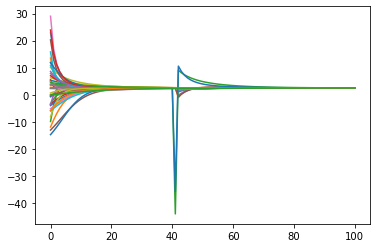

In [60]:
plt.plot(GDP_grad.transpose()[:-1])

<AxesSubplot:>

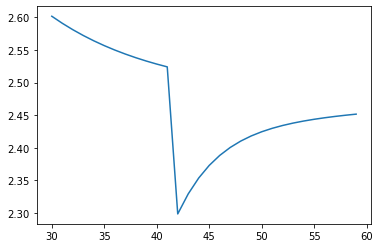

In [61]:
GDP_grad.loc['Korea, Rep.'][30:60].plot()

In [62]:
GDP_grad.loc['Korea, Rep.'][30:60]

30    2.601608
31    2.590827
32    2.581025
33    2.572107
34    2.563988
35    2.556593
36    2.549852
37    2.543706
38    2.538100
39    2.532984
40    2.528313
41    2.524049
42    2.298738
43    2.329450
44    2.353784
45    2.373059
46    2.388358
47    2.400549
48    2.410318
49    2.418201
50    2.424615
51    2.429884
52    2.434257
53    2.437929
54    2.441048
55    2.443732
56    2.446069
57    2.448128
58    2.449963
59    2.451616
Name: Korea, Rep., dtype: float64

<AxesSubplot:>

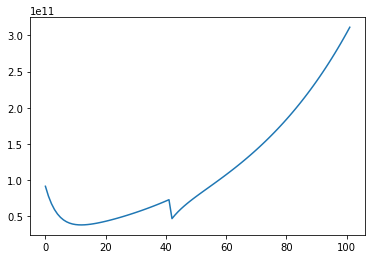

In [83]:
world_GDP.transpose()['Ukraine'].plot()

In [64]:
war_GDP_grad=GDP_grad.copy()
war_world_GDP=world_GDP.copy()

<AxesSubplot:>

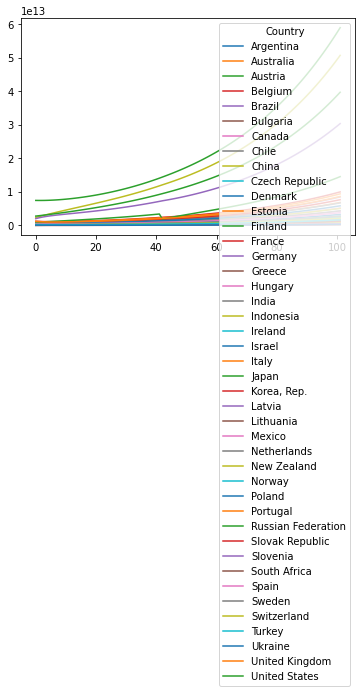

In [86]:
war_world_GDP.transpose().plot()

In [88]:
war_world_GDP.transpose()[30:50].transpose()

,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
Country,,,,,,,,,,,,,,,,,,,,
Argentina,5.715058e+11,5.869639e+11,6.027436e+11,6.188560e+11,6.353121e+11,6.521232e+11,6.693008e+11,6.868565e+11,7.048019e+11,7.231490e+11,7.419098e+11,7.610965e+11,7.807217e+11,8.002890e+11,8.202751e+11,8.406971e+11,8.615717e+11,8.829151e+11,9.047435e+11,9.270733e+11
Australia,1.177728e+12,1.210600e+12,1.244129e+12,1.278335e+12,1.313240e+12,1.348864e+12,1.385230e+12,1.422362e+12,1.460283e+12,1.499017e+12,1.538589e+12,1.579024e+12,1.620349e+12,1.662293e+12,1.704970e+12,1.748431e+12,1.792726e+12,1.837901e+12,1.884003e+12,1.931075e+12
Austria,3.078124e+11,3.153288e+11,3.230366e+11,3.309406e+11,3.390456e+11,3.473564e+11,3.558781e+11,3.646158e+11,3.735745e+11,3.827596e+11,3.921765e+11,4.018308e+11,4.117281e+11,4.199162e+11,4.285719e+11,4.376794e+11,4.472210e+11,4.571801e+11,4.675428e+11,4.782985e+11
Belgium,4.532536e+11,4.642649e+11,4.755621e+11,4.871515e+11,4.990397e+11,5.112334e+11,5.237395e+11,5.365651e+11,5.497177e+11,5.632047e+11,5.770341e+11,5.912138e+11,6.057520e+11,6.177264e+11,6.308901e+11,6.447758e+11,6.592389e+11,6.742318e+11,6.897385e+11,7.057550e+11
Brazil,1.500847e+12,1.539363e+12,1.578805e+12,1.619198e+12,1.660564e+12,1.702926e+12,1.746309e+12,1.790738e+12,1.836240e+12,1.882839e+12,1.930565e+12,1.979445e+12,2.029507e+12,2.079182e+12,2.130011e+12,2.182040e+12,2.235309e+12,2.289856e+12,2.345717e+12,2.402932e+12
Bulgaria,6.024732e+10,6.170914e+10,6.320983e+10,6.475006e+10,6.633059e+10,6.795220e+10,6.961572e+10,7.132204e+10,7.307207e+10,7.486676e+10,7.670712e+10,7.859417e+10,8.052898e+10,8.184089e+10,8.332750e+10,8.496440e+10,8.673198e+10,8.861503e+10,9.060201e+10,9.268425e+10
Canada,9.658830e+11,9.868449e+11,1.008489e+12,1.030822e+12,1.053854e+12,1.077594e+12,1.102051e+12,1.127237e+12,1.153163e+12,1.179842e+12,1.207284e+12,1.235505e+12,1.264518e+12,1.293818e+12,1.323849e+12,1.354633e+12,1.386188e+12,1.418536e+12,1.451700e+12,1.485703e+12
Chile,2.284074e+11,2.342969e+11,2.403186e+11,2.464767e+11,2.527755e+11,2.592191e+11,2.658118e+11,2.725580e+11,2.794622e+11,2.865287e+11,2.937622e+11,3.011673e+11,3.087487e+11,3.162990e+11,3.239827e+11,3.318188e+11,3.398226e+11,3.480064e+11,3.563812e+11,3.649567e+11
China,8.853014e+12,9.095583e+12,9.342654e+12,9.594440e+12,9.851152e+12,1.011300e+13,1.038019e+13,1.065294e+13,1.093144e+13,1.121592e+13,1.150658e+13,1.180362e+13,1.210727e+13,1.240026e+13,1.270057e+13,1.300843e+13,1.332407e+13,1.364771e+13,1.397954e+13,1.431978e+13


In [89]:
war_world_GDP_short=war_world_GDP.transpose()[30:50].transpose().sum(axis=1)
normal_world_GDP_short=normal_world_GDP.transpose()[30:50].transpose().sum(axis=1)
war_world_GDP_long=war_world_GDP.transpose()[30:].transpose().sum(axis=1)
normal_world_GDP_long=normal_world_GDP.transpose()[30:].transpose().sum(axis=1)

In [91]:
war_world_GDP_long/normal_world_GDP_long

Country
Argentina             0.984989
Australia             0.985805
Austria               0.978076
Belgium               0.979149
Brazil                0.984865
Bulgaria              0.975700
Canada                0.985619
Chile                 0.983966
China                 0.983610
Czech Republic        0.976906
Denmark               0.979121
Estonia               0.966496
Finland               0.973981
France                0.979777
Germany               0.978721
Greece                0.977637
Hungary               0.976134
India                 0.983317
Indonesia             0.985775
Ireland               0.980980
Israel                0.982100
Italy                 0.979076
Japan                 0.985542
Korea, Rep.           0.983204
Latvia                0.966644
Lithuania             0.964133
Mexico                0.986090
Netherlands           0.978748
New Zealand           0.985160
Norway                0.980294
Poland                0.975495
Portugal              0.980055


In [92]:
war_world_GDP_short/normal_world_GDP_short

Country
Argentina             0.998882
Australia             0.999393
Austria               0.994315
Belgium               0.995057
Brazil                0.998727
Bulgaria              0.991271
Canada                0.999199
Chile                 0.998618
China                 0.997939
Czech Republic        0.993409
Denmark               0.996179
Estonia               0.972783
Finland               0.986728
France                0.996844
Germany               0.995186
Greece                0.994675
Hungary               0.991288
India                 0.998138
Indonesia             0.999280
Ireland               0.997436
Israel                0.997007
Italy                 0.996018
Japan                 0.999073
Korea, Rep.           0.997295
Latvia                0.976147
Lithuania             0.971542
Mexico                0.999523
Netherlands           0.994778
New Zealand           0.998917
Norway                0.997826
Poland                0.992577
Portugal              0.997647


In [70]:
war_world_GDP_long/normal_world_GDP_long

Country
Argentina             0.986316
Australia             0.987046
Austria               0.980227
Belgium               0.981217
Brazil                0.986298
Bulgaria              0.978139
Canada                0.987212
Chile                 0.985440
China                 0.985006
Czech Republic        0.979082
Denmark               0.981181
Estonia               0.969686
Finland               0.976539
France                0.981858
Germany               0.980772
Greece                0.980423
Hungary               0.978390
India                 0.984995
Indonesia             0.987005
Ireland               0.982887
Israel                0.984019
Italy                 0.981195
Japan                 0.986854
Korea, Rep.           0.984733
Latvia                0.969844
Lithuania             0.967484
Mexico                0.987631
Netherlands           0.980841
New Zealand           0.986528
Norway                0.982215
Poland                0.977781
Portugal              0.982209


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
world_GDP = pd.read_csv('./data/world GDP.csv',encoding='CP949')
world_GDP=world_GDP.set_index('Country')

c_list =list(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States','Ukraine'])
for i in world_GDP.index:
    if i not in c_list:
        world_GDP=world_GDP.drop(i)

world_GDP_init=pd.DataFrame(world_GDP.mean(axis=1)).sort_index()
world_GDP_init.columns=(['a'])
world_GDP_change=world_GDP_init.copy()
world_GDP=world_GDP_init.copy()

world_transport = pd.read_csv('./data/WITS-Partner-Timeseries Export.csv',encoding='CP949')
world_transport=world_transport[world_transport['Reporter Name'].isin(c_list)]
world_transport=world_transport[world_transport['Partner Name'].isin(c_list)]

world_transport['mean']=world_transport.mean(axis=1)
world_transport=pd.pivot_table(world_transport,index='Reporter Name',columns='Partner Name',values='mean')
world_transport=world_transport.fillna(0).sort_index()

world_transport_volume = pd.read_csv('./data/WITS-Partner.csv',encoding='CP949')
world_transport_volume=world_transport_volume.set_index('Partner Name').sort_index()
for i in world_transport_volume.index:
    if i not in c_list:
        world_transport_volume=world_transport_volume.drop(i)
df2 = pd.read_csv('./data/세계 GDP.csv',encoding='CP949')
무역의존도 = pd.read_csv('./data/무역의존도.csv',encoding='CP949')
무역의존도=무역의존도.set_index('Country')
수출 = 무역의존도['2010 수출']

수출=수출/100
world_transport=world_transport/100

수출량 = 수출 * world_GDP_init.sort_index().transpose()
수출량=수출량.transpose()
수출량=수출량.dropna()
수출량.loc['Ukraine']=수출량.loc['Latvia']
수출량.loc['Russian Federation']/=2

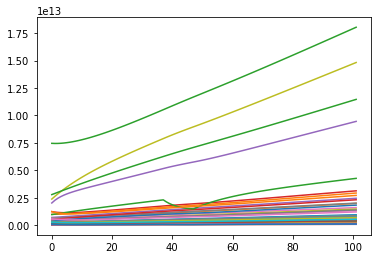

In [12]:
K=0.032

for i in c_list:
    
    for j in c_list:
        world_GDP_change.loc[i] += 수출량.loc[i]*(world_transport.loc[i][j])
        world_GDP_change.loc[j] -= 수출량.loc[i]*(world_transport.loc[i][j])
    world_GDP_change.loc[i]+=K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
world_GDP=pd.concat([world_GDP_init,world_GDP_change],axis=1)

for k in range(100):
    for i in c_list:
        if(i =='Ukraine' and k >35 and k<=45):
            world_GDP_change.loc[i]=world_GDP_change.loc[i]*0.9
        if(i =='Russian Federation' and k >35 and k<=45):
            world_GDP_change.loc[i]=world_GDP_change.loc[i]*0.9
        for j in c_list:
            world_GDP_change.loc[i] += (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j] 
            world_GDP_change.loc[j] -= (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j]
        world_GDP_change.loc[i] += K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
    world_GDP=pd.concat([world_GDP,world_GDP_change],axis=1)
world_GDP.columns=range(102)
plt.plot(world_GDP.transpose())
plt.show()


In [13]:
GDP_grad=world_GDP.copy()
for i in range(0,101):
    GDP_grad[i]=((world_GDP[i+1]-world_GDP[i])/world_GDP[i])*100

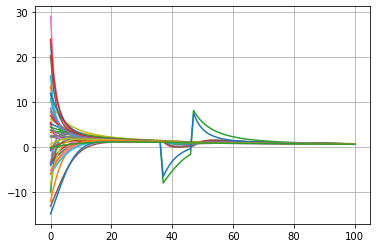

In [14]:
plt.plot(GDP_grad.transpose()[:-1])
plt.grid(True)

<AxesSubplot:>

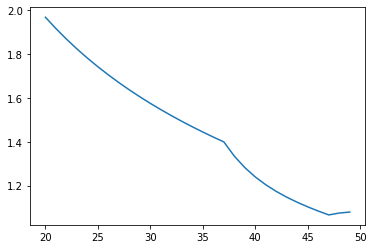

In [15]:
GDP_grad.loc['Korea, Rep.'][20:50].plot()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
world_GDP = pd.read_csv('world GDP.csv',encoding='CP949')
world_GDP=world_GDP.set_index('Country')
world_risk_list=dict()
c_list =list(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States','Ukraine'])
for i in world_GDP.index:
    if i not in c_list:
        world_GDP=world_GDP.drop(i)
for country in c_list:
    print(country)
    world_GDP = pd.read_csv('world GDP.csv',encoding='CP949')
    world_GDP=world_GDP.set_index('Country')

    

    world_GDP_init=pd.DataFrame(world_GDP.mean(axis=1)).sort_index()
    world_GDP_init.columns=(['a'])
    world_GDP_change=world_GDP_init.copy()
    world_GDP=world_GDP_init.copy()

    world_transport = pd.read_csv('./data/WITS-Partner-Timeseries Export.csv',encoding='CP949')
    world_transport=world_transport[world_transport['Reporter Name'].isin(c_list)]
    world_transport=world_transport[world_transport['Partner Name'].isin(c_list)]

    world_transport['mean']=world_transport.mean(axis=1)
    world_transport=pd.pivot_table(world_transport,index='Reporter Name',columns='Partner Name',values='mean')
    world_transport=world_transport.fillna(0).sort_index()

    world_transport_volume = pd.read_csv('./data/WITS-Partner.csv',encoding='CP949')
    world_transport_volume=world_transport_volume.set_index('Partner Name').sort_index()
    for i in world_transport_volume.index:
        if i not in c_list:
            world_transport_volume=world_transport_volume.drop(i)
    df2 = pd.read_csv('./data/세계 GDP.csv',encoding='CP949')
    무역의존도 = pd.read_csv('./data/무역의존도.csv',encoding='CP949')
    무역의존도=무역의존도.set_index('Country')
    수출 = 무역의존도['2010 수출']

    수출=수출/100
    world_transport=world_transport/100

    수출량 = 수출 * world_GDP_init.sort_index().transpose()
    수출량=수출량.transpose()
    수출량=수출량.dropna()
    K=0.032

    for i in c_list:
        for j in c_list:
            world_GDP_change.loc[i] += 수출량.loc[i]*(world_transport.loc[i][j])
            world_GDP_change.loc[j] -= 수출량.loc[i]*(world_transport.loc[i][j])
        world_GDP_change.loc[i]+=K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
    world_GDP=pd.concat([world_GDP_init,world_GDP_change],axis=1)

    for k in range(100):
        for i in c_list:
            if(i ==country and k >40 and k<=45):
                world_GDP_change.loc[i]=world_GDP_change.loc[i]*0.9
            for j in c_list:
                world_GDP_change.loc[i] += (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j] 
                world_GDP_change.loc[j] -= (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j]
            world_GDP_change.loc[i] += K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
        world_GDP=pd.concat([world_GDP,world_GDP_change],axis=1)
    world_GDP.columns=range(102)
    world_risk_list[country]=(world_GDP)


FileNotFoundError: [Errno 2] No such file or directory: 'world GDP.csv'

In [56]:
world_risk_list

NameError: name 'world_risk_list' is not defined

In [58]:
import pickle5 as pickle
with open('./data/world_risk_list.pickle', 'rb') as f:
    world_risk_list = pickle.load(f)

In [68]:
world_risk_list['China'].transpose().columns

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       ...
       'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Vietnam',
       'Virgin Islands (U.S.)', 'West Bank and Gaza', 'World', 'Yemen, Rep.',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=264)

In [59]:
risk_influ=dict()
for i in c_list:
    risk_influ[i]=world_risk_list[i].mean().mean()

KeyError: 'Russian Federation'

In [33]:
risk_influ=pd.DataFrame([risk_influ])

In [34]:
risk_influ=risk_influ.transpose()
risk_influ.columns=['value']
risk_influ.sort_values(by='value')

,value
United States,1.028221e+12
China,1.029853e+12
Japan,1.031722e+12
Germany,1.032854e+12
France,1.035993e+12
Italy,1.036201e+12
Brazil,1.036366e+12
United Kingdom,1.036406e+12
"Korea, Rep.",1.036590e+12
India,1.036598e+12


In [35]:
kr_risk_influ=dict()
for i in c_list:
    kr_risk_influ[i]=world_risk_list[i].sum()

In [36]:
kr_risk=dict()
for i in c_list:
    kr_risk[i]=world_risk_list[i].loc['Korea, Rep.'].mean()

In [37]:
kr_risk=pd.DataFrame([kr_risk]).transpose()

In [38]:
kr_risk.columns=['value']
kr_risk.sort_values(by='value')

,value
China,1.419652e+12
United States,1.424307e+12
Japan,1.439976e+12
"Korea, Rep.",1.452756e+12
Germany,1.454750e+12
France,1.472286e+12
Italy,1.473391e+12
United Kingdom,1.474146e+12
Australia,1.474311e+12
Brazil,1.474463e+12


In [39]:
world_risk_influ=dict()
for i in c_list:
    a=0
    for j in c_list:
        a+=world_risk_list[j].transpose().sum()[i]
        world_risk_influ[i]=a

In [40]:

world_risk_influ=pd.DataFrame([world_risk_influ]).transpose()

In [41]:
world_risk_influ.columns=['value']
world_risk_influ.sort_values(by='value')

,value
Estonia,1.905185e+14
Latvia,2.040654e+14
Bulgaria,3.033209e+14
Greece,3.737551e+14
Slovenia,4.063623e+14
Lithuania,4.536313e+14
Portugal,4.787283e+14
New Zealand,6.111077e+14
Israel,6.489773e+14
Finland,9.367726e+14


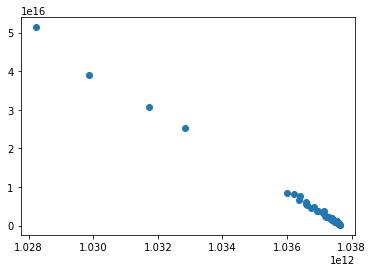

In [42]:
plt.scatter(risk_influ,world_risk_influ)

In [43]:
data=pd.concat([risk_influ,world_risk_influ,kr_risk],axis=1)

In [44]:
data.columns=['from_influ','to_influ','kr_influ']

In [46]:
data.to_csv('./data/datainflu.csv')

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


world_GDP = pd.read_csv('./data/world GDP.csv',encoding='CP949')
world_GDP=world_GDP.set_index('Country')
c_list =list(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States','Ukraine'])
for i in world_GDP.index:
    if i not in c_list:
        world_GDP=world_GDP.drop(i)
world_GDP

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.445060e+10,1.827210e+10,2.560520e+10,2.834470e+10,2.863050e+10,...,5.301630e+11,5.459820e+11,5.520250e+11,5.263200e+11,5.947490e+11,5.575310e+11,6.436290e+11,5.176270e+11,4.454450e+11,NaN
Australia,AUS,GDP (current US$),NY.GDP.MKTP.CD,1.857770e+10,1.965280e+10,1.989250e+10,2.150740e+10,2.376410e+10,2.593680e+10,2.726850e+10,...,1.396650e+12,1.546150e+12,1.576180e+12,1.467480e+12,1.351690e+12,1.208850e+12,1.329190e+12,1.432880e+12,1.396570e+12,NaN
Austria,AUT,GDP (current US$),NY.GDP.MKTP.CD,6.592694e+09,7.311750e+09,7.756110e+09,8.374175e+09,9.169984e+09,9.994071e+09,1.088770e+10,...,4.311200e+11,4.094250e+11,4.300690e+11,4.419960e+11,3.818180e+11,3.955690e+11,4.172380e+11,4.550950e+11,4.450750e+11,NaN
Belgium,BEL,GDP (current US$),NY.GDP.MKTP.CD,1.165870e+10,1.240010e+10,1.326400e+10,1.426000e+10,1.596010e+10,1.737150e+10,1.865190e+10,...,5.226460e+11,4.961810e+11,5.216430e+11,5.346780e+11,4.621500e+11,4.757400e+11,5.026980e+11,5.437340e+11,5.330970e+11,NaN
Bulgaria,BGR,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.738620e+10,5.403330e+10,5.561540e+10,5.690200e+10,5.064740e+10,5.380690e+10,5.897150e+10,6.623020e+10,6.855880e+10,NaN
Brazil,BRA,GDP (current US$),NY.GDP.MKTP.CD,1.516560e+10,1.523690e+10,1.992630e+10,2.302150e+10,2.121190e+10,2.179000e+10,2.706270e+10,...,2.616200e+12,2.465190e+12,2.472810e+12,2.455990e+12,1.802210e+12,1.795700e+12,2.062830e+12,1.885480e+12,1.839760e+12,NaN
Canada,CAN,GDP (current US$),NY.GDP.MKTP.CD,4.046170e+10,4.093500e+10,4.222740e+10,4.503000e+10,4.937750e+10,5.451520e+10,6.108840e+10,...,1.788650e+12,1.828690e+12,1.847210e+12,1.803530e+12,1.556130e+12,1.528240e+12,1.649880e+12,1.716260e+12,1.736430e+12,NaN
Switzerland,CHE,GDP (current US$),NY.GDP.MKTP.CD,9.522747e+09,1.071270e+10,1.188000e+10,1.306360e+10,1.448060e+10,1.534670e+10,1.648010e+10,...,6.995800e+11,6.680440e+11,6.885040e+11,7.091830e+11,6.798320e+11,6.713090e+11,6.799500e+11,7.051410e+11,7.030820e+11,NaN
Chile,CHL,GDP (current US$),NY.GDP.MKTP.CD,4.110000e+09,4.609727e+09,5.416273e+09,5.668188e+09,5.982348e+09,6.026594e+09,7.072641e+09,...,2.522520e+11,2.671220e+11,2.783840e+11,2.605420e+11,2.439190e+11,2.504400e+11,2.770450e+11,2.982580e+11,2.823180e+11,NaN


In [87]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('data/data.npy')#확률o fj-dn x
data2 = np.load('data/data2.npy')#확률 o 러-우 50고정
data3 = np.load('data/data3.npy')#확률 x 러-우 0-100


In [88]:
data.shape

(1, 100, 43, 102)

In [89]:
data2.shape

(1, 100, 43, 102)

In [90]:
data3.shape

(101, 1, 43, 102)

In [91]:
data[0].mean(axis=0).shape

(43, 102)

No handles with labels found to put in legend.


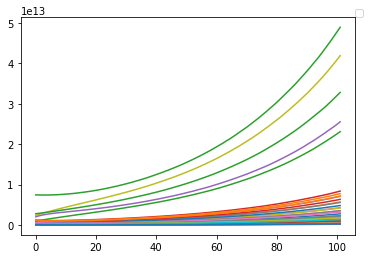

In [94]:
plt.plot(data[0].mean(axis=0).transpose())
plt.legend(loc=(1.0, 1.0))

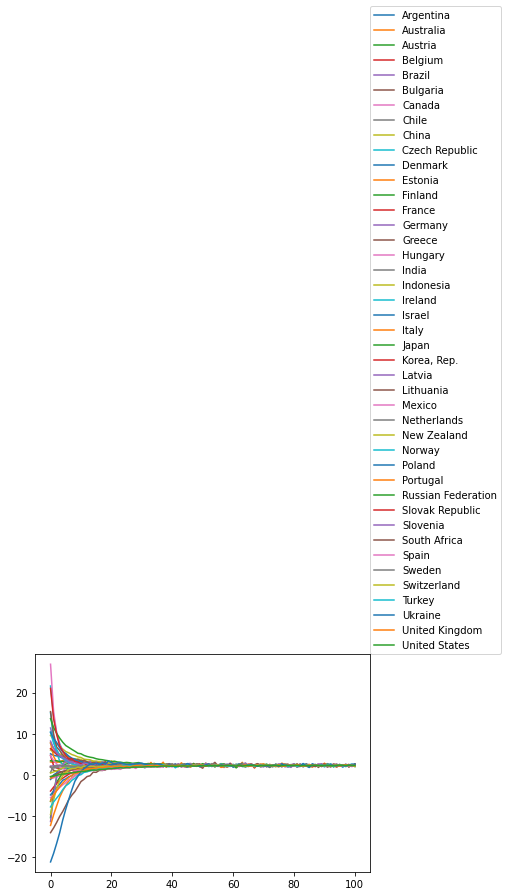

In [18]:
GDP_grad=world_GDP.copy()
for i in range(0,101):
    GDP_grad[i]=((data[0].mean(axis=0).transpose()[i+1]-data[0].mean(axis=0).transpose()[i])/data[0].mean(axis=0).transpose()[i])*100
GDP_grad.transpose()[1:].plot()
plt.legend(loc=(1.0, 1.0))

No handles with labels found to put in legend.


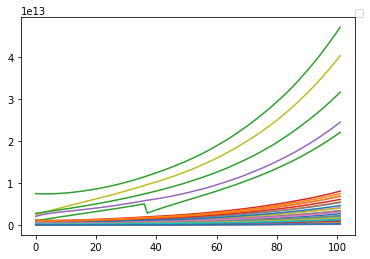

In [19]:
plt.plot(data2[0].mean(axis=0).transpose())
plt.legend(loc=(1.0, 1.0))

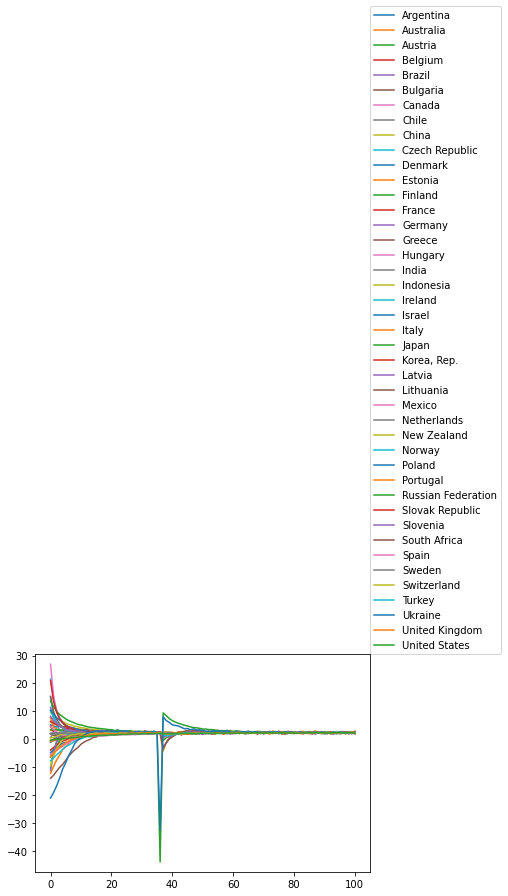

In [20]:
GDP_grad=world_GDP.copy()
for i in range(0,101):
    GDP_grad[i]=((data2[0].mean(axis=0).transpose()[i+1]-data2[0].mean(axis=0).transpose()[i])/data2[0].mean(axis=0).transpose()[i])*100
GDP_grad.transpose()[1:].plot()
plt.legend(loc=(1.0, 1.0))

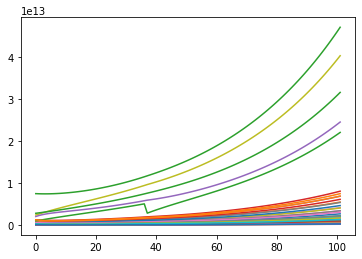

In [21]:
plt.plot(data3.mean(axis=0)[0].transpose())

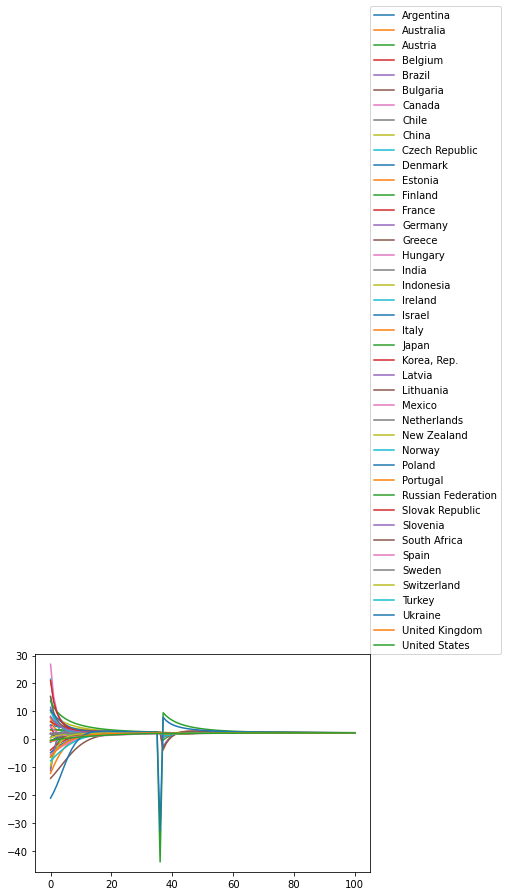

In [22]:
GDP_grad=world_GDP.copy()
for i in range(0,101):
    GDP_grad[i]=((data3.mean(axis=0)[0].transpose()[i+1]-data3.mean(axis=0)[0].transpose()[i])/data3.mean(axis=0)[0].transpose()[i])*100
GDP_grad.transpose()[1:].plot()
plt.legend(loc=(1.0, 1.0))

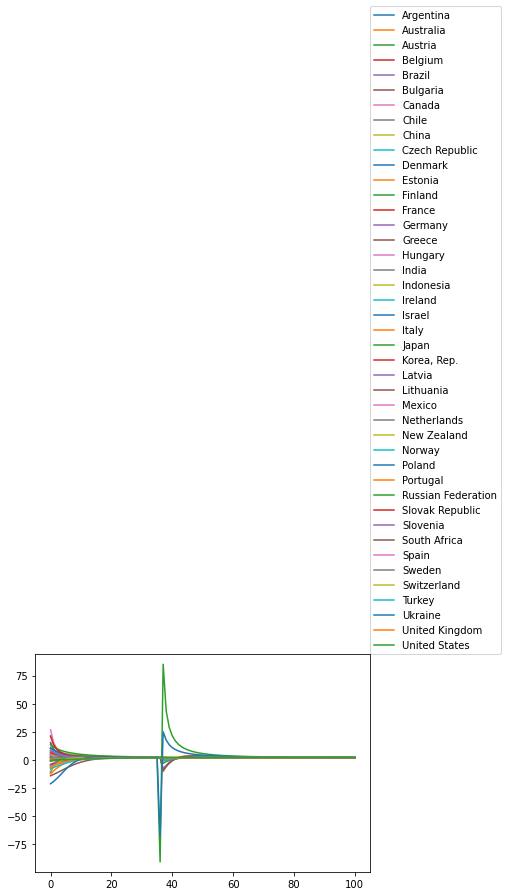

In [28]:
GDP_grad=world_GDP.copy()
for i in range(0,101):
    GDP_grad[i]=((data3[100][0].transpose()[i+1]-data3[100][0].transpose()[i])/data3[100][0].transpose()[i])*100
GDP_grad.transpose()[1:].plot()
plt.legend(loc=(1.0, 1.0))

In [24]:
data3.shape

(101, 1, 43, 102)

In [25]:
pagerank_pivot=pd.read_csv('./data/pagerank_pivot.csv')

In [26]:
pagerank_pivot=pagerank_pivot.set_index('Reporter Name')

In [27]:
pagerank_pivot

,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,United States
Reporter Name,,,,,,,,,,,,,,,,,,,,,
Argentina,0.010805,0.011426,0.011789,0.030280,0.084342,0.002300,0.043907,0.028146,0.048065,0.007272,...,0.003744,0.002353,0.007226,0.030369,0.012848,0.019457,0.010014,0.003567,0.050992,0.155407
Australia,0.005408,0.025523,0.012368,0.029621,0.011788,0.001875,0.044345,0.005282,0.052250,0.007282,...,0.003621,0.002443,0.009505,0.024597,0.014818,0.019600,0.009958,0.002980,0.055665,0.152946
Austria,0.003307,0.009027,0.019179,0.034170,0.009192,0.007079,0.033095,0.002961,0.032369,0.027034,...,0.024118,0.022868,0.005048,0.030130,0.016713,0.028573,0.013971,0.007182,0.055731,0.114850
Belgium,0.004730,0.010915,0.015535,0.034568,0.012612,0.008407,0.037808,0.005058,0.036135,0.012036,...,0.006604,0.003732,0.008424,0.031898,0.019794,0.022466,0.013420,0.004714,0.063752,0.131002
Brazil,0.071260,0.011952,0.012303,0.030282,0.027124,0.002330,0.043452,0.025477,0.046692,0.007327,...,0.003480,0.002308,0.007704,0.029147,0.013369,0.019993,0.010315,0.004190,0.051010,0.149922
Bulgaria,0.004389,0.009373,0.020149,0.031621,0.010392,0.005059,0.033777,0.007155,0.034301,0.014555,...,0.009875,0.009087,0.004753,0.030071,0.014240,0.021326,0.026392,0.019890,0.055206,0.117456
Canada,0.007870,0.014331,0.012961,0.030627,0.015469,0.002732,0.053729,0.008173,0.044332,0.007425,...,0.003882,0.002515,0.006479,0.025313,0.014678,0.020487,0.010728,0.003542,0.056021,0.205225
Chile,0.076949,0.012162,0.011211,0.028932,0.049432,0.001939,0.044330,0.010465,0.048151,0.006849,...,0.003308,0.002072,0.006862,0.030001,0.012851,0.018183,0.009904,0.003412,0.049588,0.153451
China,0.010734,0.027109,0.012724,0.029795,0.020964,0.002988,0.044494,0.017001,0.048358,0.007872,...,0.004473,0.002247,0.010087,0.025042,0.014047,0.020242,0.011049,0.007387,0.052668,0.151094


In [44]:
data3[100][0].sum(axis=1)

array([1.03522648e+14, 2.13284597e+14, 5.34826865e+13, 7.81995529e+13,
       2.69674018e+14, 9.81645231e+12, 1.67814322e+14, 4.04201117e+13,
       1.56042335e+15, 8.53351564e+13, 5.34542546e+13, 7.23077007e+12,
       3.39380912e+13, 3.15828593e+14, 9.50270554e+14, 1.19764972e+13,
       6.34102041e+13, 2.12164843e+14, 1.57710990e+14, 4.11612050e+13,
       2.30432250e+13, 2.91555549e+14, 1.23929595e+15, 2.38116696e+14,
       6.60383811e+12, 1.78662304e+13, 1.38073419e+14, 1.31232338e+14,
       2.44197594e+13, 7.54233644e+13, 1.76876441e+14, 1.69703247e+13,
       7.62158288e+14, 3.72223167e+13, 1.59748565e+13, 4.39511375e+13,
       1.20379105e+14, 8.55883187e+13, 6.64225119e+13, 5.05507578e+13,
       9.42295441e+12, 2.71752637e+14, 1.90933285e+15])

In [63]:
risk=수출량.sort_index().copy()
risk['a']=data3[0][0].sum(axis=1)/data3[0][0].sum(axis=1)

In [64]:
risk['a']

Country
Argentina             1.0
Australia             1.0
Austria               1.0
Belgium               1.0
Brazil                1.0
Bulgaria              1.0
Canada                1.0
Chile                 1.0
China                 1.0
Czech Republic        1.0
Denmark               1.0
Estonia               1.0
Finland               1.0
France                1.0
Germany               1.0
Greece                1.0
Hungary               1.0
India                 1.0
Indonesia             1.0
Ireland               1.0
Israel                1.0
Italy                 1.0
Japan                 1.0
Korea, Rep.           1.0
Latvia                1.0
Lithuania             1.0
Mexico                1.0
Netherlands           1.0
New Zealand           1.0
Norway                1.0
Poland                1.0
Portugal              1.0
Russian Federation    1.0
Slovak Republic       1.0
Slovenia              1.0
South Africa          1.0
Spain                 1.0
Sweden                1.0
Swit

In [65]:
for i in range(1,101):
    data=수출량.sort_index().copy()
    data['a']=data3[i][0].sum(axis=1)/data3[0][0].sum(axis=1)
    risk=pd.concat([risk,data],axis=1)
risk.columns=range(101)

In [66]:
risk.columns=range(101)

In [67]:
risk

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,1.0,0.999509,0.999018,0.998527,0.998035,0.997544,0.997053,0.996562,0.996071,0.995580,...,0.955304,0.954813,0.954322,0.953831,0.953340,0.952848,0.952357,0.951866,0.951375,0.950884
Australia,1.0,0.999531,0.999061,0.998592,0.998122,0.997653,0.997183,0.996714,0.996245,0.995775,...,0.957282,0.956812,0.956343,0.955873,0.955404,0.954934,0.954465,0.953996,0.953526,0.953057
Austria,1.0,0.999329,0.998658,0.997987,0.997317,0.996646,0.995975,0.995304,0.994633,0.993962,...,0.938953,0.938282,0.937611,0.936941,0.936270,0.935599,0.934928,0.934257,0.933586,0.932915
Belgium,1.0,0.999358,0.998716,0.998074,0.997432,0.996790,0.996148,0.995507,0.994865,0.994223,...,0.941585,0.940943,0.940301,0.939659,0.939017,0.938375,0.937733,0.937091,0.936449,0.935807
Brazil,1.0,0.999509,0.999017,0.998526,0.998035,0.997544,0.997052,0.996561,0.996070,0.995579,...,0.955296,0.954805,0.954313,0.953822,0.953331,0.952840,0.952348,0.951857,0.951366,0.950875
Bulgaria,1.0,0.999271,0.998541,0.997812,0.997083,0.996353,0.995624,0.994895,0.994166,0.993436,...,0.933633,0.932903,0.932174,0.931445,0.930715,0.929986,0.929257,0.928527,0.927798,0.927069
Canada,1.0,0.999541,0.999081,0.998622,0.998163,0.997703,0.997244,0.996785,0.996326,0.995866,...,0.958203,0.957744,0.957285,0.956825,0.956366,0.955907,0.955448,0.954988,0.954529,0.954070
Chile,1.0,0.999482,0.998965,0.998447,0.997929,0.997411,0.996894,0.996376,0.995858,0.995341,...,0.952888,0.952370,0.951853,0.951335,0.950817,0.950300,0.949782,0.949264,0.948746,0.948229
China,1.0,0.999466,0.998931,0.998397,0.997863,0.997328,0.996794,0.996260,0.995725,0.995191,...,0.951377,0.950843,0.950309,0.949774,0.949240,0.948706,0.948171,0.947637,0.947103,0.946568


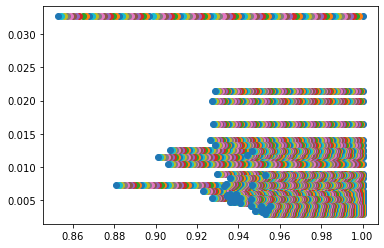

In [80]:
for i in range(101):
    plt.scatter(risk[i],pagerank_pivot['Ukraine'])

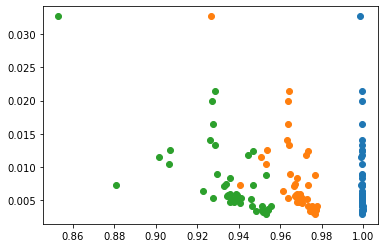

In [85]:
plt.scatter(risk[1],pagerank_pivot['Ukraine'])
plt.scatter(risk[50],pagerank_pivot['Ukraine'])
plt.scatter(risk[100],pagerank_pivot['Ukraine'])
set

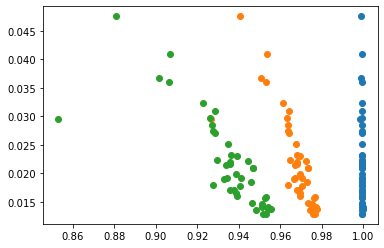

In [86]:
plt.scatter(risk[1],pagerank_pivot['Russian Federation'])
plt.scatter(risk[50],pagerank_pivot['Russian Federation'])
plt.scatter(risk[100],pagerank_pivot['Russian Federation'])

In [79]:
pagerank_pivot['Russian Federation'].sort_values()

Reporter Name
Australia             0.012850
New Zealand           0.012881
Chile                 0.013539
Canada                0.013652
Mexico                0.013773
Argentina             0.014044
United States         0.014055
Brazil                0.014612
South Africa          0.014808
Japan                 0.015686
Indonesia             0.015752
Portugal              0.016061
Spain                 0.016595
France                0.017000
Belgium               0.017027
United Kingdom        0.017826
Slovenia              0.017870
Korea, Rep.           0.018520
Austria               0.018949
Germany               0.019071
Ireland               0.019137
Norway                0.019831
India                 0.020875
China                 0.020924
Greece                0.021479
Denmark               0.021546
Italy                 0.021976
Israel                0.022183
Czech Republic        0.022384
Switzerland           0.023085
Sweden                0.023266
Netherlands           0.0